<a href="https://colab.research.google.com/github/devflow8/sHealth/blob/main/dpMLSH_L1_P3_110221_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SmartHealth: Investigation of PhysioNet Apnea-ECG Database

https://www.physionet.org/content/apnea-ecg/1.0.0/

http://ecg.mit.edu/george/publications/apnea-ecg-cinc-2000.pdf

https://www.physionet.org/content/apnea-ecg/1.0.0/additional-information.txt

https://www.physionet.org/files/apnea-ecg/1.0.0/annotations.html


#### Assignment 1: Devika Pace


**Machine Learning for Smart Health Systems**</br>
Instructor: Juber Rahman</br>
**Omdena School**</br>
Course Link: https://omdena.com/course/machine-learning-for-smart-health-systems/</br>
Updated: Oct 30, 2021

In [85]:
from IPython.display import display
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import os
import shutil
import posixpath

import wfdb
from wfdb import processing
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import seaborn as sns

import scipy.stats as stats

results = {}

In [1]:
!pip install hrv-analysis

     |████████████████████████████████| 11.0 MB 2.3 MB/s eta 0:00:01
     |████████████████████████████████| 775 kB 27.2 MB/s eta 0:00:01
     |████████████████████████████████| 829 kB 34.6 MB/s eta 0:00:01
  Created wheel for future: filename=future-0.18.2-py3-none-any.whl size=491059 sha256=e7f0110c542170f750bdeeb24c0653a33d9f8e9cd571e2725805f5dfd5a0c051
  Stored in directory: /home/magellan/.cache/pip/wheels/8e/70/28/3d6ccd6e315f65f245da085482a2e1c7d14b90b30f239e2cf4
Successfully built future


In [2]:
!pip install wfdb 
# help us fetch all data in single click
# The native Python waveform-database (WFDB) package. 
# A library of tools for reading, writing, and processing WFDB signals and annotations.

     |████████████████████████████████| 137 kB 1.5 MB/s eta 0:00:01
  Using cached idna-2.10-py2.py3-none-any.whl (58 kB)
  Using cached urllib3-1.25.11-py2.py3-none-any.whl (127 kB)
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.26.6
    Uninstalling urllib3-1.26.6:
      Successfully uninstalled urllib3-1.26.6
  Attempting uninstall: idna
    Found existing installation: idna 3.2
    Uninstalling idna-3.2:
      Successfully uninstalled idna-3.2


## Download content from Physionet

In [ ]:
# List the PhysioNet Databases
# package already created by physionet
dbs = wfdb.get_dbs()
display(dbs)

[['aami-ec13', 'ANSI/AAMI EC13 Test Waveforms'],
 ['accelerometry-walk-climb-drive',
  'Labeled raw accelerometry data captured during walking, stair climbing and driving'],
 ['adfecgdb', 'Abdominal and Direct Fetal ECG Database'],
 ['afdb', 'MIT-BIH Atrial Fibrillation Database'],
 ['afpdb', 'PAF Prediction Challenge Database'],
 ['aftdb', 'AF Termination Challenge Database'],
 ['ahadb', 'AHA Database Sample Excluded Record'],
 ['antimicrobial-resistance-uti',
  'AMR-UTI: Antimicrobial Resistance in Urinary Tract Infections'],
 ['apnea-ecg', 'Apnea-ECG Database'],
 ['autonomic-aging-cardiovascular',
  'Autonomic Aging: A dataset to quantify changes of cardiovascular autonomic function during healthy aging'],
 ['bhx-brain-bounding-box',
  'Brain Hemorrhage Extended (BHX): Bounding box extrapolation from thick to thin slice CT images'],
 ['bidmc', 'BIDMC PPG and Respiration Dataset'],
 ['bigideaslab-step-hr-smartwatch',
  'BigIdeasLab_STEP: Heart rate measurements captured by smartwatch

### View Records Apnea-ECG Database

NOTES:
- .dat files are digitized ECGs (16b/sample, 100samp/sec, 200 A/D mV)
- .hea files are text header files w/ names and formats
- .apn files are binary annotation files w/ annotation for each min of each of each recording indicating the presence or absence of apnea at that time
- .qrs files are machine-generated (binary) annotation files made using sqrs125 and provided for convenience (unaudited with errors)
- r.hea four respiration-related signals are combined in this file
- er.hea using WAVE allows you to examine ECG and resp signals side-by-side

In [4]:
# Download all the WFDB records and annotations from a small PhysioNet Database

# Make a temporary download directory in your current working directory
cwd = os.getcwd()
dl_dir = os.path.join(cwd, 'tmp_dl_dir')

# Download all the WFDB content
wfdb.dl_database('apnea-ecg', dl_dir=dl_dir)

# Display the downloaded content in the folder
display(os.listdir(dl_dir))

Generating record list for: a01
Generating record list for: a01er
Generating record list for: a01r
Generating record list for: a02
Generating record list for: a02er
Generating record list for: a02r
Generating record list for: a03
Generating record list for: a03er
Generating record list for: a03r
Generating record list for: a04
Generating record list for: a04er
Generating record list for: a04r
Generating record list for: a05
Generating record list for: a06
Generating record list for: a07
Generating record list for: a08
Generating record list for: a09
Generating record list for: a10
Generating record list for: a11
Generating record list for: a12
Generating record list for: a13
Generating record list for: a14
Generating record list for: a15
Generating record list for: a16
Generating record list for: a17
Generating record list for: a18
Generating record list for: a19
Generating record list for: a20
Generating record list for: b01
Generating record list for: b01er
Generating record list for

['x04.dat',
 'x22.hea',
 'a16.qrs',
 'x06.hea',
 'a11.dat',
 'a02r.hea',
 'c07.apn',
 'b01.apn',
 'a18.dat',
 'x02.hea',
 'a17.dat',
 'c09.dat',
 'a20.hea',
 'x34.qrs',
 'c01.dat',
 'a02er.hea',
 'b05.qrs',
 'x07.dat',
 'x10.apn',
 'c02.dat',
 'x01.hea',
 'x13.hea',
 'a14.qrs',
 'a04er.qrs',
 'x29.qrs',
 'x22.apn',
 'c03er.qrs',
 'x08.dat',
 'a06.hea',
 'c01er.hea',
 'b01.hea',
 'x27.qrs',
 'a02.dat',
 'x32.dat',
 'a02er.qrs',
 'a11.hea',
 'a19.qrs',
 'x12.hea',
 'x30.apn',
 'x29.dat',
 'x25.hea',
 'a19.hea',
 'a04.qrs',
 'x09.qrs',
 'x13.dat',
 'x10.dat',
 'x28.qrs',
 'x10.hea',
 'c06.apn',
 'x11.dat',
 'x34.apn',
 'c01.hea',
 'a02er.apn',
 'x31.dat',
 'x24.dat',
 'a01er.hea',
 'c10.apn',
 'b05.hea',
 'x09.apn',
 'b01er.apn',
 'c07.qrs',
 'c08.dat',
 'c08.qrs',
 'b05.apn',
 'c04.qrs',
 'x17.hea',
 'c02er.qrs',
 'b03.dat',
 'c01.apn',
 'x31.qrs',
 'x32.hea',
 'x34.dat',
 'a04.apn',
 'a09.dat',
 'a20.apn',
 'c06.dat',
 'a06.dat',
 'c05.hea',
 'b04.dat',
 'c01er.apn',
 'x29.apn',
 'c02er

NOTES:
- we will extract features from this data (from ecg signals)
- we will get the target variable from the annotations, healthy or apnea
- already labelled in a text file, 70 records and their label
- have a label for each and every minute

Medically, apnea means three conditions:
- O2 must go down by 4%
- Airflow gets obstructed by more than 50%
- Duration of this happens more than 10 seconds

(based on these 3 properties, doctors have annotated every min as healthy or apnea
quantified per minute)

QUESTION:
but taken in aggregate what is threshold to say someone is a sleep apnea patient??

Apnea def'n (characteristics):
- airflow gets blocked
- oxygenation goes down
- brain wakes up
- therefore subject doesn't feel rested
- feels tired upon waking
- may feel drowsy all day, sleepy
- trouble working, concentrating
- very common disease, ~20% suffering
- usually after 40 years old

In [4]:
DIR = os.path.join(os.getcwd(), 'tmp_dl_dir')
print(len([name for name in os.listdir(DIR) if os.path.isfile(os.path.join(DIR, name))]))

328


## Pre-processing and peak detection

In [8]:
#!pip install matplotlib==3.1.3
!pip install matplotlib==3.3.4

     |████████████████████████████████| 11.6 MB 2.8 MB/s eta 0:00:01
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.1.3
    Uninstalling matplotlib-3.1.3:
      Successfully uninstalled matplotlib-3.1.3


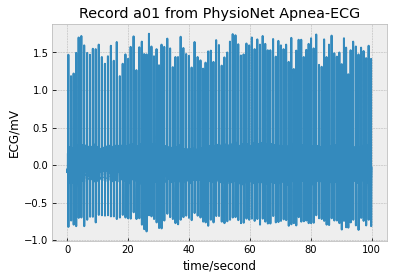

{'record_name': 'a01',
 'n_sig': 1,
 'fs': 100,
 'counter_freq': None,
 'base_counter': None,
 'sig_len': 10000,
 'base_time': None,
 'base_date': None,
 'comments': [],
 'sig_name': ['ECG'],
 'p_signal': array([[-0.06 ],
        [-0.065],
        [-0.06 ],
        ...,
        [-0.095],
        [-0.07 ],
        [-0.035]]),
 'd_signal': None,
 'e_p_signal': None,
 'e_d_signal': None,
 'file_name': ['a01.dat'],
 'fmt': ['16'],
 'samps_per_frame': [1],
 'skew': [None],
 'byte_offset': [None],
 'adc_gain': [200.0],
 'baseline': [0],
 'units': ['mV'],
 'adc_res': [12],
 'adc_zero': [0],
 'init_value': [-12],
 'checksum': [64591],
 'block_size': [0]}

In [173]:
# use wfdb to visualize the data

# Load the WFDB record 10 sec segment and the physical samples
record = wfdb.rdrecord('tmp_dl_dir/a01', sampfrom=0, sampto=10000)

wfdb.plot_wfdb(record=record, time_units='seconds', title='Record a01 from PhysioNet Apnea-ECG') 
display(record.__dict__)

In [10]:
#Use the GQRS detection algorithm and correct the peaks

def peaks_hr(sig, peak_inds, fs, title, figsize=(20, 10), saveto=None):
    "Plot a signal with its peaks and heart rate"
    # Calculate heart rate
    hrs = processing.hr.compute_hr(sig_len=sig.shape[0], qrs_inds=peak_inds, fs=fs)
    
    N = sig.shape[0]
    
    fig, ax_left = plt.subplots(figsize=figsize)
    ax_right = ax_left.twinx()
    
    ax_left.plot(sig, color='#3979f0', label='Signal')
    ax_left.plot(peak_inds, sig[peak_inds], 'rx', marker='x', 
                 color='#8b0000', label='Peak', markersize=12)
    ax_right.plot(np.arange(N), hrs, label='Heart rate', color='m', linewidth=2)

    ax_left.set_title(title)

    ax_left.set_xlabel('Time (ms)')
    ax_left.set_ylabel('ECG (mV)', color='#3979f0')
    ax_right.set_ylabel('Heart rate (bpm)', color='m')
    # Make the y-axis label, ticks and tick labels match the line color.
    ax_left.tick_params('y', colors='#3979f0')
    ax_right.tick_params('y', colors='m')
    if saveto is not None:
        plt.savefig(saveto, dpi=600)
    plt.show()

In [2]:
!pip install biosppy

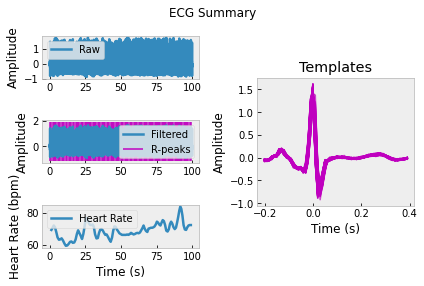

In [174]:
# get R peaks
# use this package to get all the features in python (as with the HRVAnalysis 1.2 software (used in windows))
import biosppy
ind= biosppy.signals.ecg.ecg(record.p_signal[:,0], sampling_rate=100, show=True)

# does a lot of the signal processing for you, e.g. removing the noise, dealing with motion artifacting

In [4]:
# Now load the entire duration of the signal and get r peaks

record = wfdb.rdrecord('tmp_dl_dir/a01', sampfrom=0,sampto=100000)
ind= biosppy.signals.ecg.ecg(record.p_signal[:,0], sampling_rate=100, show=False)
#ind

In [5]:
print(ind.keys())

['ts', 'filtered', 'rpeaks', 'templates_ts', 'templates', 'heart_rate_ts', 'heart_rate']


In [8]:
print(np.average(ind['heart_rate']))

72.96930558410631


In [9]:
rr_ind = np.diff(ind['rpeaks'])
print(rr_ind)
rr_ms = [element * 10 for element in rr_ind]
print(rr_ms)

[88 84 83 ... 87 98 88]
[880, 840, 830, 830, 880, 940, 970, 940, 930, 940, 1000, 1020, 1010, 990, 970, 950, 980, 1010, 940, 900, 860, 850, 970, 930, 930, 840, 770, 770, 810, 810, 840, 840, 810, 830, 890, 1000, 930, 880, 860, 850, 870, 890, 910, 920, 880, 970, 1000, 940, 860, 820, 840, 870, 880, 880, 920, 900, 900, 920, 900, 900, 910, 910, 880, 880, 930, 900, 870, 910, 890, 880, 890, 840, 830, 830, 920, 880, 850, 840, 870, 840, 840, 860, 820, 800, 800, 840, 840, 820, 780, 790, 840, 860, 920, 860, 810, 800, 810, 850, 880, 850, 820, 770, 740, 710, 700, 780, 830, 890, 870, 840, 830, 830, 830, 800, 790, 780, 870, 850, 880, 800, 790, 870, 920, 880, 850, 830, 850, 920, 940, 890, 850, 820, 830, 850, 850, 810, 810, 900, 920, 870, 830, 880, 920, 930, 920, 890, 920, 940, 910, 870, 880, 910, 910, 860, 790, 740, 730, 810, 990, 910, 850, 780, 750, 750, 870, 880, 860, 840, 810, 770, 740, 730, 760, 800, 800, 780, 790, 770, 750, 730, 710, 690, 670, 670, 690, 710, 720, 700, 700, 740, 840, 890, 880, 900,

![][logo]

[logo]: img/ecg_normalized.png 

In [10]:
# remove ectopic beats and interpolate
from hrvanalysis import remove_ectopic_beats, interpolate_nan_values, get_time_domain_features, get_frequency_domain_features, get_geometrical_features
from hrvanalysis import get_csi_cvi_features, get_poincare_plot_features
ect_ind = remove_ectopic_beats(rr_ms)
nn_interval = interpolate_nan_values(rr_intervals=ect_ind)

10 ectopic beat(s) have been deleted with malik rule.


## Inspect Data

In [11]:
df = pd.DataFrame(ind)
df = df.transpose()
df.columns = ind.keys()
df.head(10)

,ts,filtered,rpeaks,templates_ts,templates,heart_rate_ts,heart_rate
0,0.0,-0.00249,39,-0.2,"[-0.059183796446801135, -0.055456020941219555,...",1.27,69.264069
1,0.01,-0.003505,127,-0.19,"[-0.04462555708779685, -0.05445902408889949, -...",2.11,70.633182
2,0.02,0.000819,211,-0.18,"[-0.04625915980805281, -0.04238038636799103, -...",2.94,72.002295
3,0.03,-0.005741,294,-0.17,"[-0.03846840351288389, -0.0570638385485035, -0...",3.77,70.920044
4,0.04,-0.000531,377,-0.16,"[-0.058589699903953046, -0.06056979816426901, ...",4.65,68.100254
5,0.05,0.006566,465,-0.15,"[-0.04522393119064459, -0.04792452070975044, -...",5.59,64.622425
6,0.06,-0.001547,559,-0.14,"[-0.05082074137162784, -0.04732606977962655, -...",6.56,63.171748
7,0.07,-0.006962,656,-0.13,"[-0.05232384081372087, -0.04205205781807215, -...",7.5,63.400529
8,0.08,-0.007017,750,-0.12,"[-0.03979296986809356, -0.058468333147438, -0....",8.43,64.058568
9,0.09,-0.006599,843,-0.11,"[-0.05420406073904583, -0.055860851660551936, ...",9.37,62.781972


In [12]:
time_domain_features = get_time_domain_features(nn_interval)

## Time Domain Measures

In [13]:
time_dict = get_time_domain_features(nn_interval)
results['avnn'] = time_dict['mean_nni']
results['hr'] = time_dict['mean_hr']
results['SDNN'] = time_dict['sdnn']
results['pNN50'] = time_dict['pnni_20']
results['RMSSD'] = time_dict['rmssd']
results['HRdiff'] = time_dict['max_hr'] - time_dict['min_hr']

In [14]:
print(results)

{'avnn': 831.5137614678899, 'hr': 73.04062883477803, 'SDNN': 90.6995053435377, 'pNN50': 47.24540901502504, 'RMSSD': 43.32246985099053, 'HRdiff': 45.45454545454545}


In [15]:
time_dict

{'mean_nni': 831.5137614678899,
 'sdnn': 90.6995053435377,
 'sdsd': 43.32246985099053,
 'nni_50': 197,
 'pnni_50': 16.4440734557596,
 'nni_20': 566,
 'pnni_20': 47.24540901502504,
 'rmssd': 43.32246985099053,
 'median_nni': 830.0,
 'range_nni': 500.0,
 'cvsd': 0.05210072503732518,
 'cvnni': 0.10907757579793245,
 'mean_hr': 73.04062883477803,
 'max_hr': 100.0,
 'min_hr': 54.54545454545455,
 'std_hr': 8.17932967742073}

## Frequency Domain Measures
Apply a Fast Fourier Transform (FFT) to the time-series data to obtain frequency domain measures.

In [16]:
from hrvanalysis.extract_features import get_frequency_domain_features
freq_dict = get_frequency_domain_features(nn_interval)

results['VLF'] = freq_dict['vlf']
results['LF'] = freq_dict['lf']
results['HF'] = freq_dict['hf']
results['LHFratio'] = freq_dict['lf_hf_ratio']

In [17]:
freq_dict

{'lf': 1672.2046668444693,
 'hf': 663.069710839543,
 'lf_hf_ratio': 2.5219138191777972,
 'lfnu': 71.60634668132073,
 'hfnu': 28.393653318679256,
 'total_power': 3588.340309453534,
 'vlf': 1253.0659317695213}

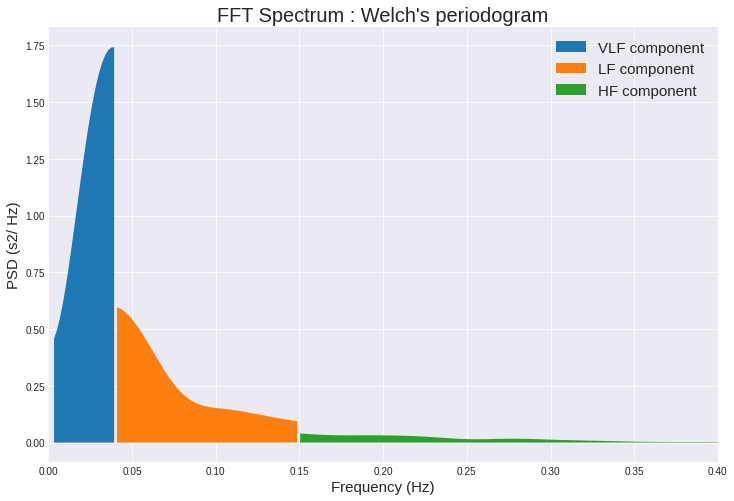

In [18]:
from hrvanalysis import plot_psd

plot_psd(nn_interval, method="welch")

In [19]:
print(results), len(results.items())

{'avnn': 831.5137614678899, 'hr': 73.04062883477803, 'SDNN': 90.6995053435377, 'pNN50': 47.24540901502504, 'RMSSD': 43.32246985099053, 'HRdiff': 45.45454545454545, 'VLF': 1253.0659317695213, 'LF': 1672.2046668444693, 'HF': 663.069710839543, 'LHFratio': 2.5219138191777972}


(None, 10)

In [21]:
print(len(nn_interval))

1199


## Poincare Plot features

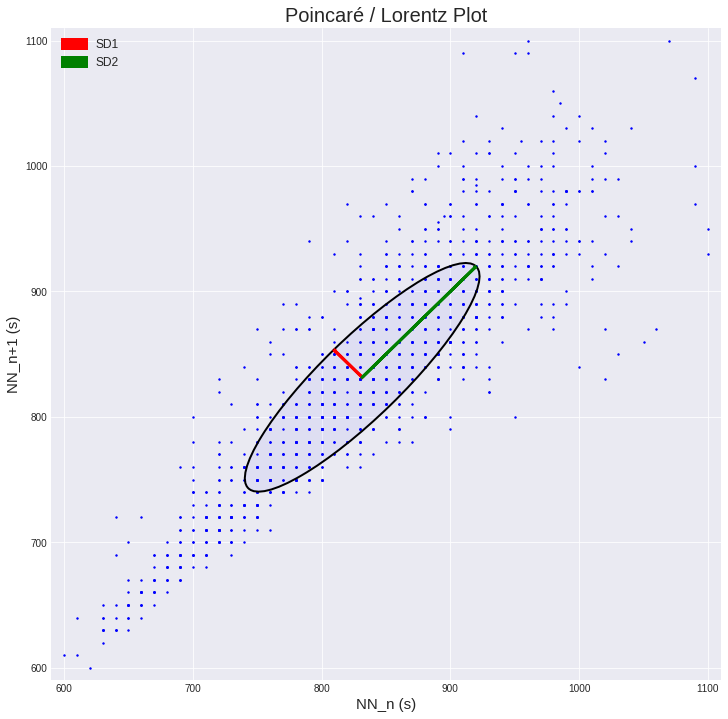

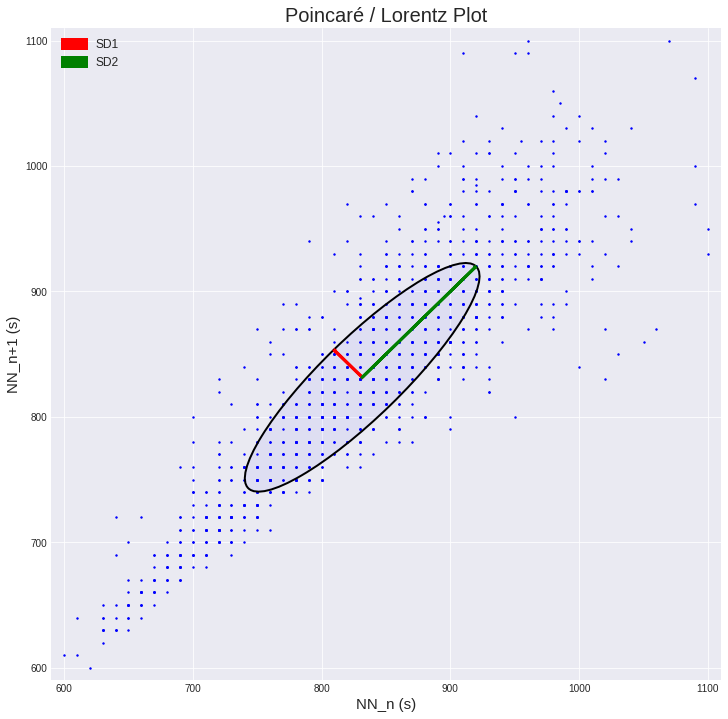

In [22]:
from hrvanalysis import plot_poincare

plot_poincare(nn_interval)
plot_poincare(nn_interval, plot_sd_features=True)

In [23]:
results['record']='a01'

In [32]:
import csv
csv_columns = results.keys()

csv_file = "features.csv"
try:
    with open(csv_file, 'w') as csvfile:
        writer = csv.DictWriter(csvfile, fieldnames=csv_columns)
        writer.writeheader()
        writer.writerow(results)
        
except IOError:
    print("I/O error")

## Parse and save all subject signal data 

In [28]:
subjects = list(set([name[:3] for name in os.listdir(DIR)]))
subjects.sort()
len(os.listdir(DIR)), len(subjects)#, subjects

(328, 70)

In [29]:
DIR

'tmp_dl_dir'

In [278]:
#dir = 'tmp_dl_dir'
def process_ecg(s_index, subject, dir='tmp_dl_dir'):
  result_signal = {}
  # load the entire duration of the signal and get r peaks
  record = wfdb.rdrecord(f'{dir}/{subject}', sampfrom=0,sampto=100000)
  ind= biosppy.signals.ecg.ecg(record.p_signal[:,0], sampling_rate=100, show=False)
  print('s_index: ', s_index)
  print('ihr:', np.average(ind['heart_rate']))
  # get the diff btwn r peaks in msec
  rr_ind = np.diff(ind['rpeaks'])
  #print('rr_ind:', rr_ind)
  rr_ms = [element * 10 for element in rr_ind]
  #print('rr_ms:', rr_ms)
  # remove ectopic beats from list
  ect_ind = remove_ectopic_beats(rr_ms)
  # get interpolated values
  nn_interval = interpolate_nan_values(rr_intervals=ect_ind)
  #return nn_interval
 
  # get time domain features
  time_dict = get_time_domain_features(nn_interval)
  result_signal['avnn'] = time_dict['mean_nni']
  result_signal['hr'] = time_dict['mean_hr']
  print('hr: ', result_signal['hr'])
  result_signal['SDNN'] = time_dict['sdnn']
  result_signal['pNN50'] = time_dict['pnni_20']
  result_signal['RMSSD'] = time_dict['rmssd']
  result_signal['HRdiff'] = time_dict['max_hr'] - time_dict['min_hr']
  # get freq domain features
  freq_dict = get_frequency_domain_features(nn_interval)
  result_signal['VLF'] = freq_dict['vlf']
  result_signal['LF'] = freq_dict['lf']
  result_signal['HF'] = freq_dict['hf']
  result_signal['LHFratio'] = freq_dict['lf_hf_ratio']

  result_signal['record'] = subject

  return result_signal

In [279]:
import csv
csv_columns = results.keys()

csv_file_all = "features_all.csv"
try:
    with open(csv_file_all, 'w') as csv_file_all:
        writer = csv.DictWriter(csv_file_all, fieldnames=csv_columns)
        writer.writeheader()
        for idx, subject in enumerate(subjects):
          result_signal = process_ecg(idx, subject)
          writer.writerow(result_signal)
        
except IOError:
    print("I/O error")

s_index:  0
ihr: 72.96930558410631
10 ectopic beat(s) have been deleted with malik rule.
hr:  73.04062883477803
s_index:  1
ihr: 79.6369722515599
20 ectopic beat(s) have been deleted with malik rule.
hr:  84.55735826708907
s_index:  2
ihr: 63.17765882597735
6 ectopic beat(s) have been deleted with malik rule.
hr:  63.09428159813443
s_index:  3
ihr: 82.41518390838127
17 ectopic beat(s) have been deleted with malik rule.
hr:  82.82723766985511
s_index:  4
ihr: 60.88205118580222
2 ectopic beat(s) have been deleted with malik rule.
hr:  60.88749847659243
s_index:  5
ihr: 59.395091744863194
13 ectopic beat(s) have been deleted with malik rule.
hr:  59.45896722552785
s_index:  6
ihr: 74.83966684904284
4 ectopic beat(s) have been deleted with malik rule.
hr:  74.85827787077888
s_index:  7
ihr: 87.13762273576891
7 ectopic beat(s) have been deleted with malik rule.
hr:  87.15246362827202
s_index:  8
ihr: 65.52356262172735
10 ectopic beat(s) have been deleted with malik rule.
hr:  65.33846488254

## Import and merge Subject Annotations table with Signals table

In [10]:
annotations = pd.read_csv ('annotations apnea-ecg dataset-table.txt', sep='\t')
annotations.head()

,Record,Length minutes,non-apn minutes,apnea minutes,hours w/apnea,AI,HI,AHI,Age,Sex,height (cm),weight (kg),Unnamed: 12,Unnamed: 13
0,a01,490.0,20.0,470.0,9.0,12.5,57.1,69.6,51.0,M,175.0,102.0,NaN,NaN
1,a02,529.0,109.0,420.0,9.0,57.2,12.3,69.5,38.0,M,180.0,120.0,NaN,NaN
2,a03,520.0,274.0,246.0,9.0,38.4,0.7,39.1,54.0,M,168.0,80.0,NaN,NaN
3,a04,493.0,40.0,453.0,9.0,73.4,4.0,77.4,52.0,M,173.0,121.0,NaN,NaN
4,a05,455.0,179.0,276.0,8.0,35.0,6.0,41.0,58.0,M,176.0,78.0,NaN,NaN


In [11]:
annotations.drop(['Unnamed: 12', 'Unnamed: 13'], axis=1, inplace=True)
annotations.head()

,Record,Length minutes,non-apn minutes,apnea minutes,hours w/apnea,AI,HI,AHI,Age,Sex,height (cm),weight (kg)
0,a01,490.0,20.0,470.0,9.0,12.5,57.1,69.6,51.0,M,175.0,102.0
1,a02,529.0,109.0,420.0,9.0,57.2,12.3,69.5,38.0,M,180.0,120.0
2,a03,520.0,274.0,246.0,9.0,38.4,0.7,39.1,54.0,M,168.0,80.0
3,a04,493.0,40.0,453.0,9.0,73.4,4.0,77.4,52.0,M,173.0,121.0
4,a05,455.0,179.0,276.0,8.0,35.0,6.0,41.0,58.0,M,176.0,78.0


In [118]:
annotations.to_csv (r'annotations apnea-ecg dataset-table.csv', index=False)

### Start Analysis

In [3]:
annotations = pd.read_csv('annotations apnea-ecg dataset-table.csv')

In [4]:
signals = pd.read_csv('features_all.csv')
signals.head()

,avnn,hr,SDNN,pNN50,RMSSD,HRdiff,VLF,LF,HF,LHFratio,record
0,831.513761,73.040629,90.699505,47.245409,43.322470,45.454545,1.253066e+03,1.672205e+03,6.630697e+02,2.521914,a01
1,755.933485,84.557358,64.424733,9.077156,37.133484,5941.747573,9.715965e+02,7.729338e+02,4.106547e+02,1.882199,a02
2,17441.346154,63.094282,101765.236602,57.281553,84112.241637,272.657110,4.589937e+08,7.046431e+07,6.001843e+06,11.740446,a03
3,729.207451,82.827238,48.530037,3.581871,27.266419,163.353500,4.430518e+02,2.851670e+02,2.091080e+02,1.363731,a04
4,990.203373,60.887498,67.965054,46.176763,36.608316,36.304962,1.592097e+03,1.088706e+03,3.806619e+02,2.860034,a05


In [5]:
anot_signals = pd.merge(annotations, signals, left_on='Record', right_on='record').drop('record', axis=1)
anot_signals

,Record,Length minutes,non-apn minutes,apnea minutes,hours w/apnea,AI,HI,AHI,Age,Sex,...,avnn,hr,SDNN,pNN50,RMSSD,HRdiff,VLF,LF,HF,LHFratio
0,a01,490.0,20.0,470.0,9.0,12.50,57.1,69.60,51.0,M,...,831.513761,73.040629,90.699505,47.245409,43.322470,45.454545,1.253066e+03,1.672205e+03,6.630697e+02,2.521914
1,a02,529.0,109.0,420.0,9.0,57.20,12.3,69.50,38.0,M,...,755.933485,84.557358,64.424733,9.077156,37.133484,5941.747573,9.715965e+02,7.729338e+02,4.106547e+02,1.882199
2,a03,520.0,274.0,246.0,9.0,38.40,0.7,39.10,54.0,M,...,17441.346154,63.094282,101765.236602,57.281553,84112.241637,272.657110,4.589937e+08,7.046431e+07,6.001843e+06,11.740446
3,a04,493.0,40.0,453.0,9.0,73.40,4.0,77.40,52.0,M,...,729.207451,82.827238,48.530037,3.581871,27.266419,163.353500,4.430518e+02,2.851670e+02,2.091080e+02,1.363731
4,a05,455.0,179.0,276.0,8.0,35.00,6.0,41.00,58.0,M,...,990.203373,60.887498,67.965054,46.176763,36.608316,36.304962,1.592097e+03,1.088706e+03,3.806619e+02,2.860034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,x31,558.0,42.0,516.0,10.0,86.80,6.7,93.50,29.0,F,...,991.212425,62.126889,148.427508,64.994985,67.483049,81.834532,3.483876e+03,2.125542e+03,1.022782e+03,2.078198
66,x32,539.0,114.0,425.0,9.0,63.30,8.5,71.80,29.0,F,...,1005.529768,60.645305,116.552528,76.969697,78.971930,124.553571,2.053907e+03,2.224366e+03,1.660136e+03,1.339870
67,x33,474.0,471.0,3.0,0.0,0.13,0.0,0.13,28.0,F,...,714.964209,85.708406,81.202893,34.455587,45.767492,291.085506,7.587059e+02,1.497610e+03,9.358604e+02,1.600249
68,x34,476.0,472.0,4.0,0.0,0.38,0.0,0.38,30.0,F,...,714.871060,85.805574,83.695243,35.340502,48.109791,291.716687,9.836190e+02,1.699065e+03,1.007047e+03,1.687175


In [6]:
pd.set_option('display.max_columns', None)
df_signals = annotations.set_index("Record").join(signals.set_index("record"), how = "inner")
df_signals

,Length minutes,non-apn minutes,apnea minutes,hours w/apnea,AI,HI,AHI,Age,Sex,height (cm),weight (kg),avnn,hr,SDNN,pNN50,RMSSD,HRdiff,VLF,LF,HF,LHFratio
a01,490.0,20.0,470.0,9.0,12.50,57.1,69.60,51.0,M,175.0,102.0,831.513761,73.040629,90.699505,47.245409,43.322470,45.454545,1.253066e+03,1.672205e+03,6.630697e+02,2.521914
a02,529.0,109.0,420.0,9.0,57.20,12.3,69.50,38.0,M,180.0,120.0,755.933485,84.557358,64.424733,9.077156,37.133484,5941.747573,9.715965e+02,7.729338e+02,4.106547e+02,1.882199
a03,520.0,274.0,246.0,9.0,38.40,0.7,39.10,54.0,M,168.0,80.0,17441.346154,63.094282,101765.236602,57.281553,84112.241637,272.657110,4.589937e+08,7.046431e+07,6.001843e+06,11.740446
a04,493.0,40.0,453.0,9.0,73.40,4.0,77.40,52.0,M,173.0,121.0,729.207451,82.827238,48.530037,3.581871,27.266419,163.353500,4.430518e+02,2.851670e+02,2.091080e+02,1.363731
a05,455.0,179.0,276.0,8.0,35.00,6.0,41.00,58.0,M,176.0,78.0,990.203373,60.887498,67.965054,46.176763,36.608316,36.304962,1.592097e+03,1.088706e+03,3.806619e+02,2.860034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
x31,558.0,42.0,516.0,10.0,86.80,6.7,93.50,29.0,F,183.0,100.0,991.212425,62.126889,148.427508,64.994985,67.483049,81.834532,3.483876e+03,2.125542e+03,1.022782e+03,2.078198
x32,539.0,114.0,425.0,9.0,63.30,8.5,71.80,29.0,F,183.0,100.0,1005.529768,60.645305,116.552528,76.969697,78.971930,124.553571,2.053907e+03,2.224366e+03,1.660136e+03,1.339870
x33,474.0,471.0,3.0,0.0,0.13,0.0,0.13,28.0,F,169.0,57.0,714.964209,85.708406,81.202893,34.455587,45.767492,291.085506,7.587059e+02,1.497610e+03,9.358604e+02,1.600249
x34,476.0,472.0,4.0,0.0,0.38,0.0,0.38,30.0,F,168.0,56.0,714.871060,85.805574,83.695243,35.340502,48.109791,291.716687,9.836190e+02,1.699065e+03,1.007047e+03,1.687175


In [7]:
df_signals.describe().T

,count,mean,std,min,25%,50%,75%,max
Length minutes,70.0,4.918286e+02,3.157644e+01,401.000000,470.250000,496.000000,511.000000,5.780000e+02
non-apn minutes,70.0,3.051714e+02,1.565717e+02,11.000000,180.750000,320.500000,453.250000,5.350000e+02
apnea minutes,70.0,1.866571e+02,1.722754e+02,0.000000,3.250000,178.000000,323.500000,5.340000e+02
hours w/apnea,70.0,5.085714e+00,3.899992e+00,0.000000,0.000000,6.500000,9.000000,1.000000e+01
AI,70.0,2.185800e+01,2.410123e+01,0.000000,0.030000,14.200000,34.750000,8.680000e+01
HI,70.0,6.189571e+00,9.423092e+00,0.000000,0.000000,3.500000,8.900000,5.710000e+01
AHI,70.0,2.804757e+01,2.753778e+01,0.000000,0.130000,21.000000,42.750000,9.350000e+01
Age,70.0,4.514286e+01,1.083778e+01,27.000000,38.000000,44.000000,53.750000,6.300000e+01
height (cm),70.0,1.758429e+02,5.588901e+00,158.000000,171.500000,177.000000,179.750000,1.840000e+02
weight (kg),70.0,8.675714e+01,2.073045e+01,53.000000,69.750000,85.000000,102.000000,1.350000e+02


In [8]:
df_signals.info()

<class 'pandas.core.frame.DataFrame'>
Index: 70 entries, a01 to x35
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Length minutes   70 non-null     float64
 1   non-apn minutes  70 non-null     float64
 2   apnea minutes    70 non-null     float64
 3   hours w/apnea    70 non-null     float64
 4   AI               70 non-null     float64
 5   HI               70 non-null     float64
 6   AHI              70 non-null     float64
 7   Age              70 non-null     float64
 8   Sex              70 non-null     object 
 9   height (cm)      70 non-null     float64
 10  weight (kg)      70 non-null     float64
 11  avnn             70 non-null     float64
 12  hr               70 non-null     float64
 13  SDNN             70 non-null     float64
 14  pNN50            70 non-null     float64
 15  RMSSD            70 non-null     float64
 16  HRdiff           70 non-null     float64
 17  VLF              70 

### Create target Apnea column

In [9]:
df_signals['Apnea'] = (df_signals['AHI'] > 5)*1
df_signals['Sex'] = df_signals['Sex'].map(lambda x: 1 if 'F' in x else 0)
df_signals

,Length minutes,non-apn minutes,apnea minutes,hours w/apnea,AI,HI,AHI,Age,Sex,height (cm),weight (kg),avnn,hr,SDNN,pNN50,RMSSD,HRdiff,VLF,LF,HF,LHFratio,Apnea
a01,490.0,20.0,470.0,9.0,12.50,57.1,69.60,51.0,0,175.0,102.0,831.513761,73.040629,90.699505,47.245409,43.322470,45.454545,1.253066e+03,1.672205e+03,6.630697e+02,2.521914,1
a02,529.0,109.0,420.0,9.0,57.20,12.3,69.50,38.0,0,180.0,120.0,755.933485,84.557358,64.424733,9.077156,37.133484,5941.747573,9.715965e+02,7.729338e+02,4.106547e+02,1.882199,1
a03,520.0,274.0,246.0,9.0,38.40,0.7,39.10,54.0,0,168.0,80.0,17441.346154,63.094282,101765.236602,57.281553,84112.241637,272.657110,4.589937e+08,7.046431e+07,6.001843e+06,11.740446,1
a04,493.0,40.0,453.0,9.0,73.40,4.0,77.40,52.0,0,173.0,121.0,729.207451,82.827238,48.530037,3.581871,27.266419,163.353500,4.430518e+02,2.851670e+02,2.091080e+02,1.363731,1
a05,455.0,179.0,276.0,8.0,35.00,6.0,41.00,58.0,0,176.0,78.0,990.203373,60.887498,67.965054,46.176763,36.608316,36.304962,1.592097e+03,1.088706e+03,3.806619e+02,2.860034,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
x31,558.0,42.0,516.0,10.0,86.80,6.7,93.50,29.0,1,183.0,100.0,991.212425,62.126889,148.427508,64.994985,67.483049,81.834532,3.483876e+03,2.125542e+03,1.022782e+03,2.078198,1
x32,539.0,114.0,425.0,9.0,63.30,8.5,71.80,29.0,1,183.0,100.0,1005.529768,60.645305,116.552528,76.969697,78.971930,124.553571,2.053907e+03,2.224366e+03,1.660136e+03,1.339870,1
x33,474.0,471.0,3.0,0.0,0.13,0.0,0.13,28.0,1,169.0,57.0,714.964209,85.708406,81.202893,34.455587,45.767492,291.085506,7.587059e+02,1.497610e+03,9.358604e+02,1.600249,0
x34,476.0,472.0,4.0,0.0,0.38,0.0,0.38,30.0,1,168.0,56.0,714.871060,85.805574,83.695243,35.340502,48.109791,291.716687,9.836190e+02,1.699065e+03,1.007047e+03,1.687175,0


### EDA

In [12]:
apnea = df_signals['Apnea']==True
healthy = ~apnea

Average Heart Rate (HR)

,count,mean,std,min,25%,50%,75%,max
Apnea,,,,,,,,
0,25.0,111.416250,45.148903,48.668867,68.421020,92.379021,153.000701,183.813548
1,45.0,76.816179,20.838065,58.761388,66.706724,72.618290,79.009790,166.378184


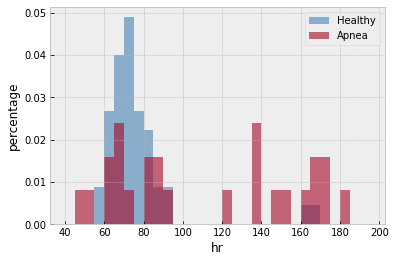

In [65]:
ax1 = plt.subplot(111)
df_signals[apnea]['hr'].hist(ax=ax1, color='steelblue', label='Apnea', alpha=0.6, bins=np.arange(40,200, 5), density=True)
df_signals[healthy]['hr'].hist(ax=ax1, color='#A60628', label='Healthy', alpha=0.6, bins=np.arange(40,200, 5), density=True)
ax1.legend(loc='best')

plt.legend(['Healthy','Apnea'])
plt.xlabel('hr')
plt.ylabel('percentage')
df_signals.groupby(['Apnea'])['hr'].describe()

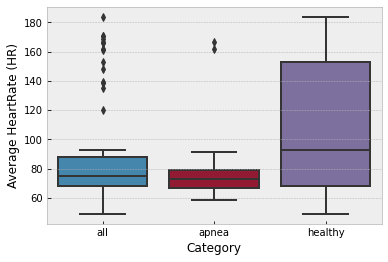

In [18]:
plt.style.use('bmh')
all_data = pd.DataFrame({'all': df_signals['hr'], 
                         'apnea': df_signals[apnea]['hr'], 
                         'healthy': df_signals[healthy]['hr']})
column_titles = ['All Subjects', 'Apnea Subjects', 'Healthy Subjects']
sns.boxplot(data=all_data).set(
    ylabel='Average HeartRate (HR)', 
    xlabel='Category');

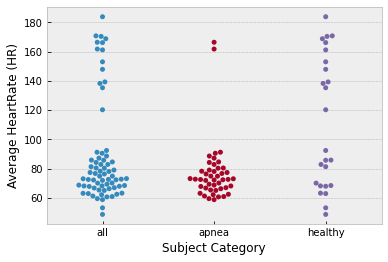

In [15]:
sns.swarmplot(data=all_data).set(
    ylabel='Average HeartRate (HR)', 
    xlabel='Subject Category');

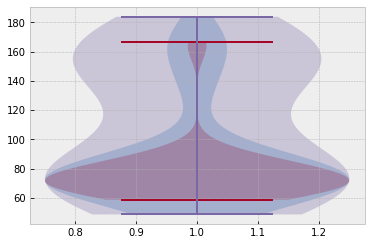

In [14]:
plt.violinplot(df_signals['hr']);
plt.violinplot(df_signals[apnea]['hr']);
plt.violinplot(df_signals[healthy]['hr']);

We have a small and unbalanced dataset with most of the subjects appearing to be apnea patients.  The 'apnea' group appears to have a relatively normal distribution (excluding a few outliers) where as the 'healthy' group (not displaying apnea) appear to have a bimodal distribution or perhaps even uniform, it is very hard to say as there are so few subjects, and any trends are not really well formed. 

Perhaps, we have not classified our data correctly with the AHI > 5.  Or there may be something else going here resulting in multimodal distributions indicating other issues and outliers.  The 'healthy' group appears also in effect to be relatively uniform in distribution perhaps indicating just a small group of observations.  

#### Hypothesis Testing

In [40]:
U,p = stats.mannwhitneyu(df_signals[apnea]['hr'],df_signals[healthy]['hr'])
U,p

(330.0, 0.002230136597501802)

The Mann-Whitney U test (Non-Parametric T-test for unpaired data sets, also having unequal size and variance) shows a significant difference for the two group regarding average HR with a p-value of ~0.0022, well less than threshold of 0.05 indicating stochastic dominance for the 'healthy' group.

Let's look for any correlating factors:

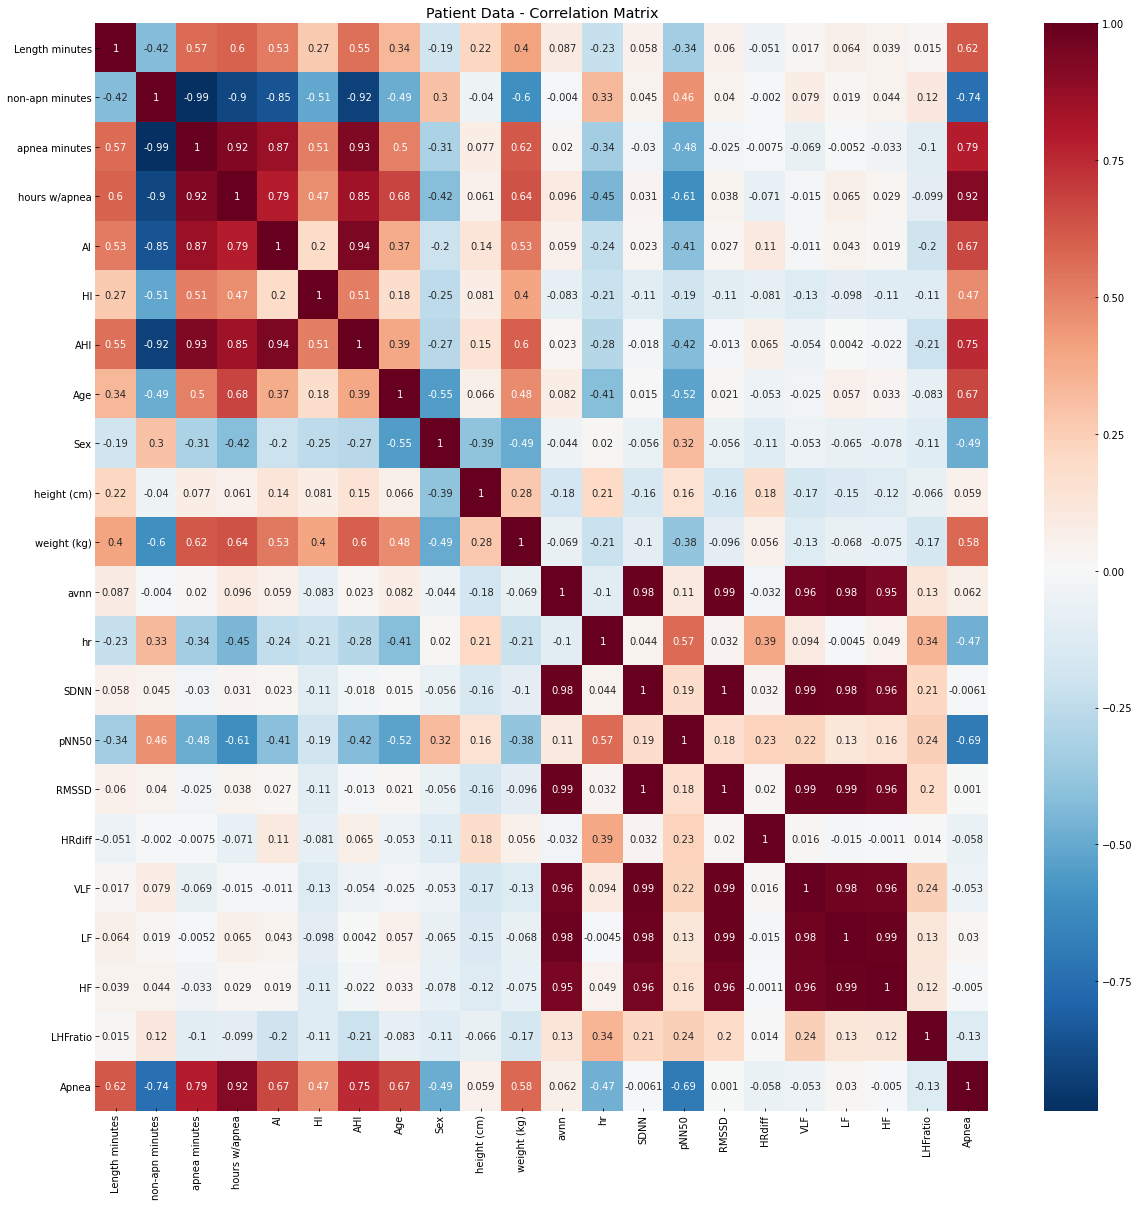

In [68]:
# Correlation Matrix
plt.figure(figsize=(20,20))

corrMatrix = df_signals.corr()
sns.heatmap(corrMatrix, annot=True,cmap="RdBu_r")
plt.title('Patient Data - Correlation Matrix')
plt.show()

Let's Look at the other features side by side between groups:

In [16]:
df_signals.columns

Index(['Length minutes', 'non-apn minutes', 'apnea minutes', 'hours w/apnea',
       'AI', 'HI', 'AHI', 'Age', 'Sex', 'height (cm)', 'weight (kg)', 'avnn',
       'hr', 'SDNN', 'pNN50', 'RMSSD', 'HRdiff', 'VLF', 'LF', 'HF', 'LHFratio',
       'Apnea'],
      dtype='object')

In [77]:
df_signals['Apnea'].mean()

0.6428571428571429

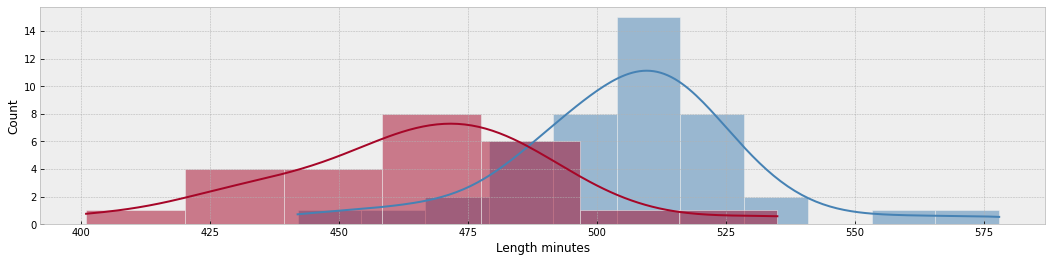

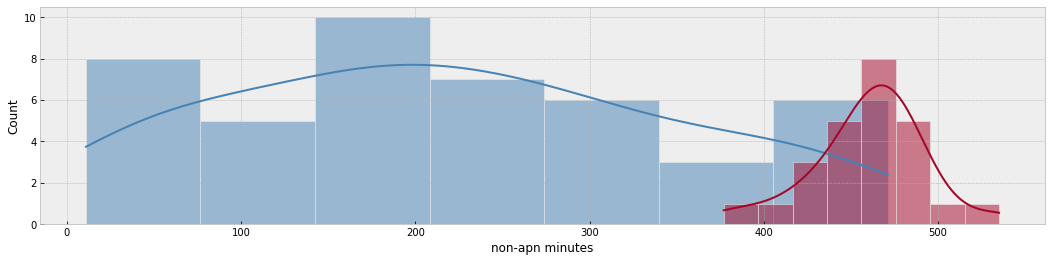

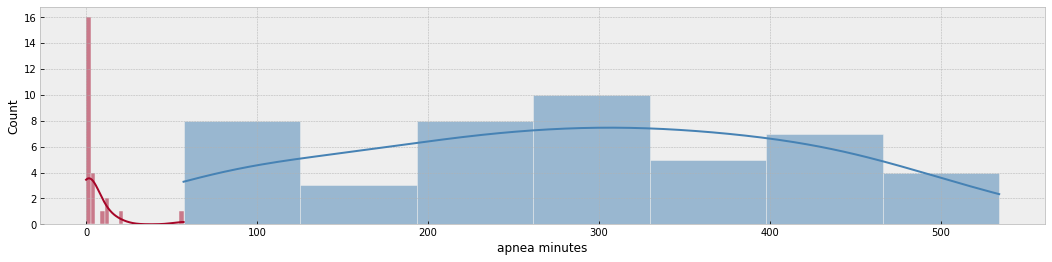

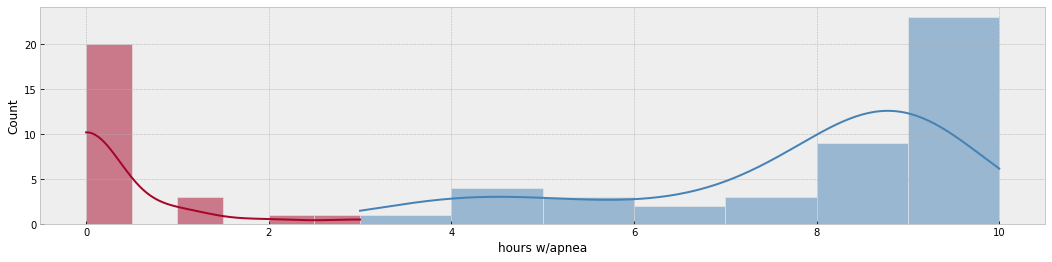

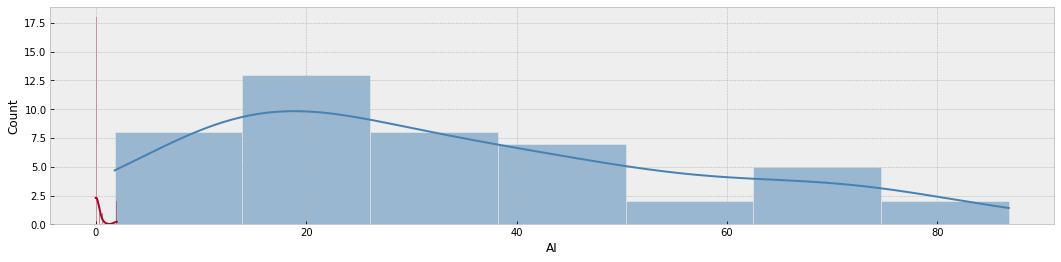

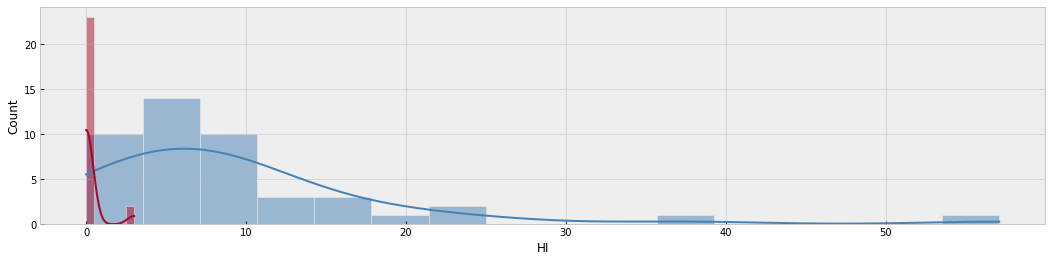

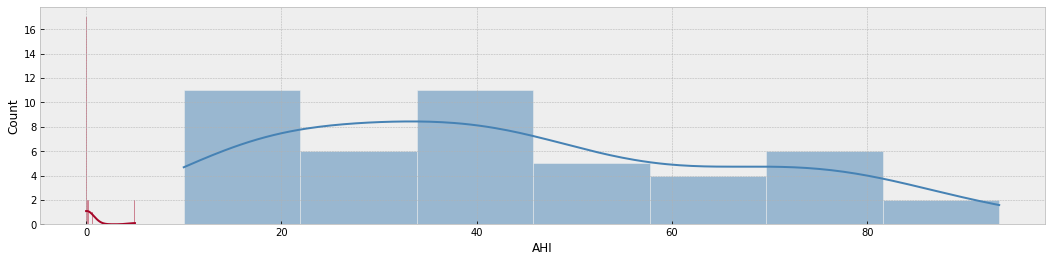

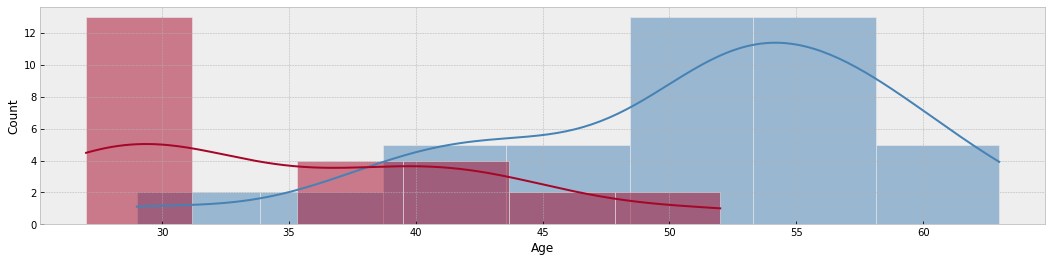

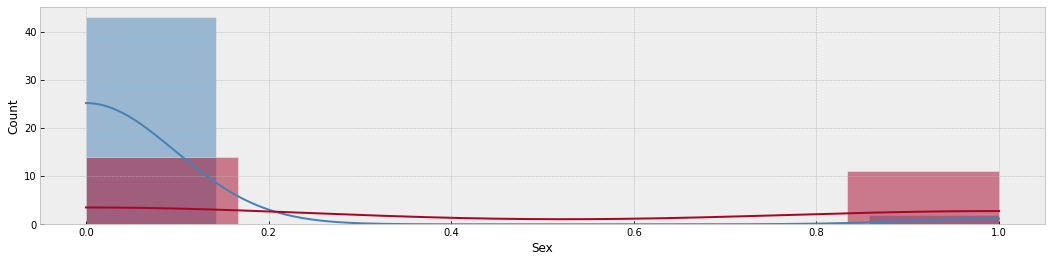

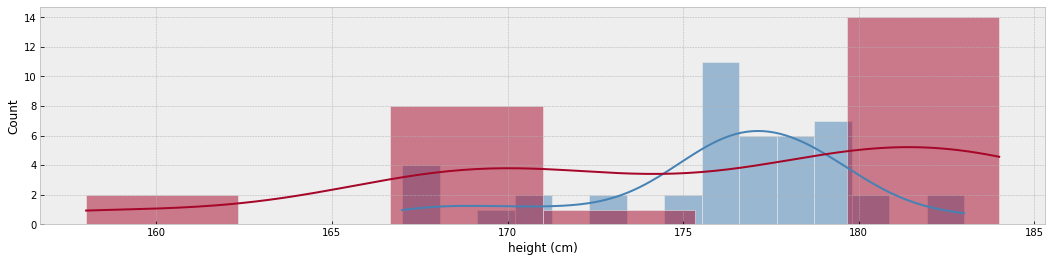

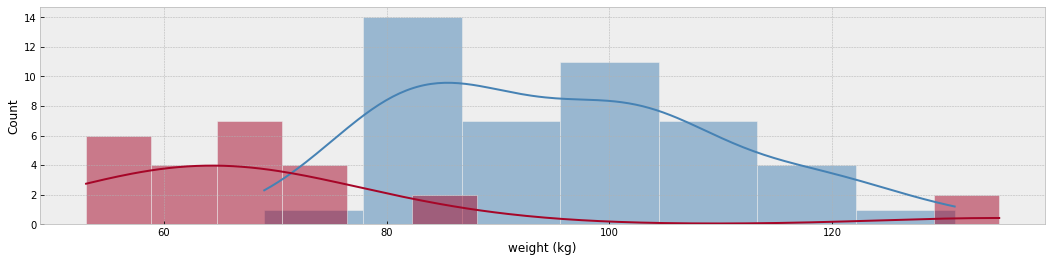

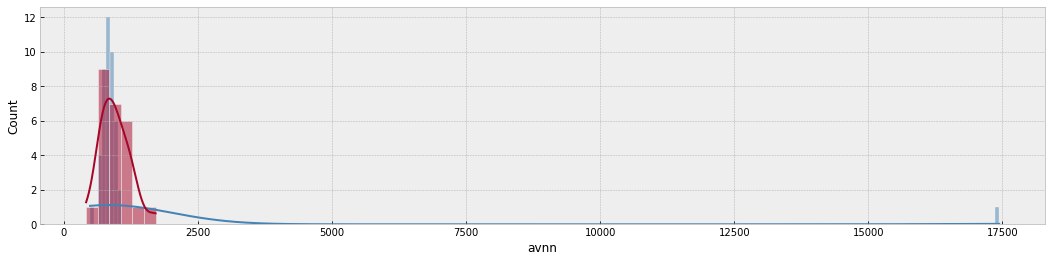

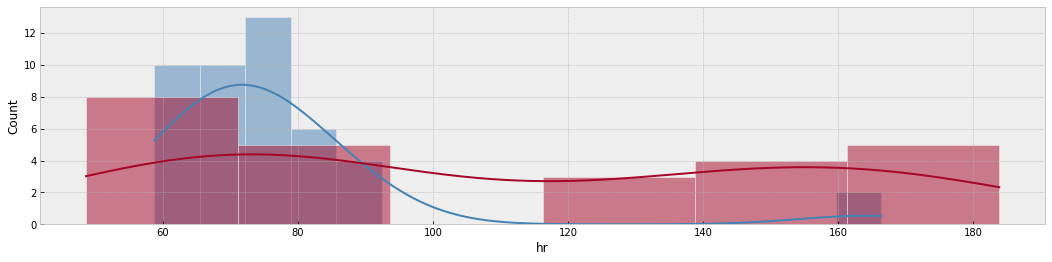

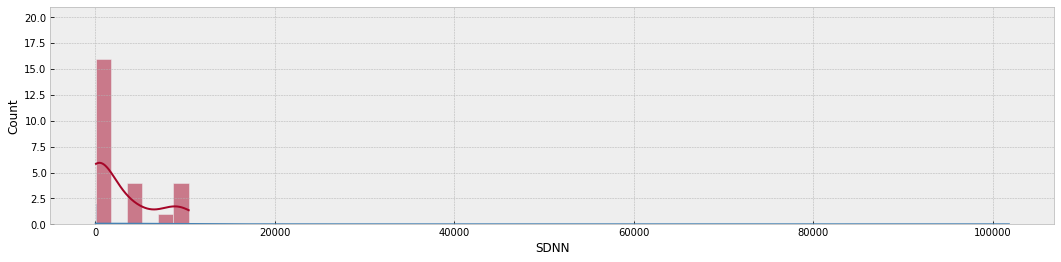

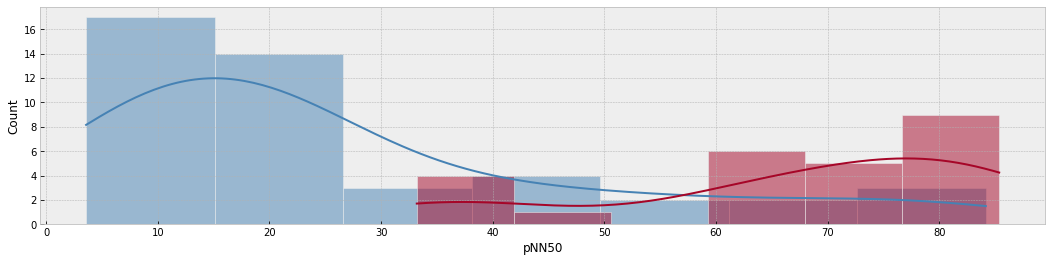

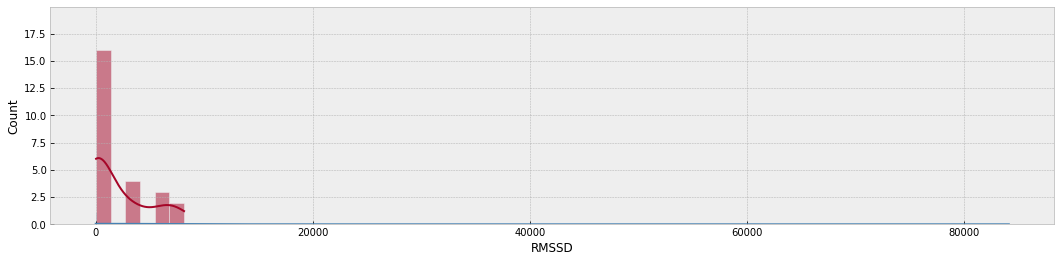

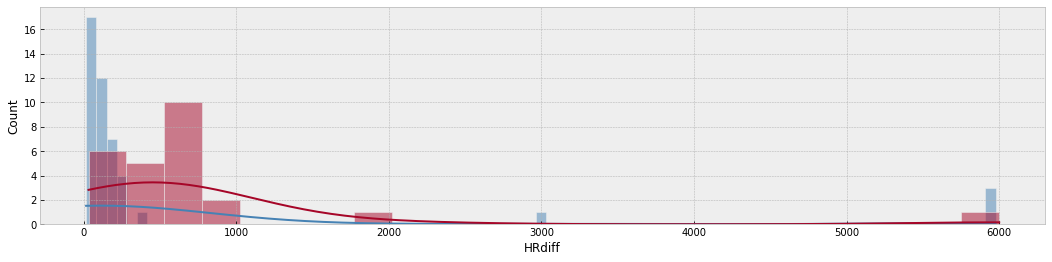

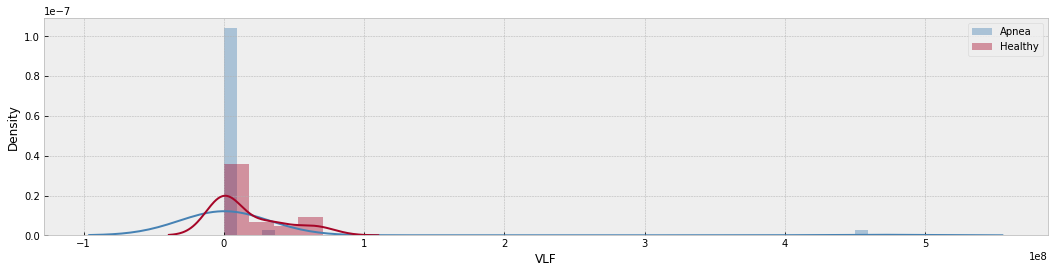

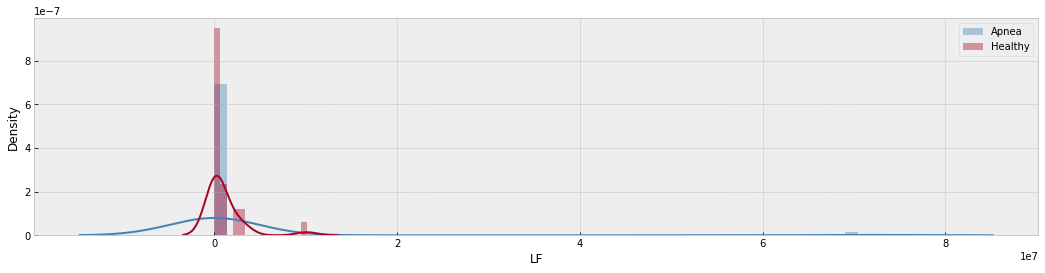

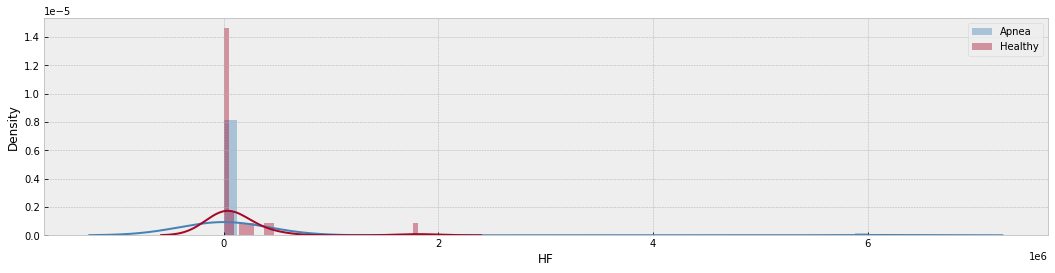

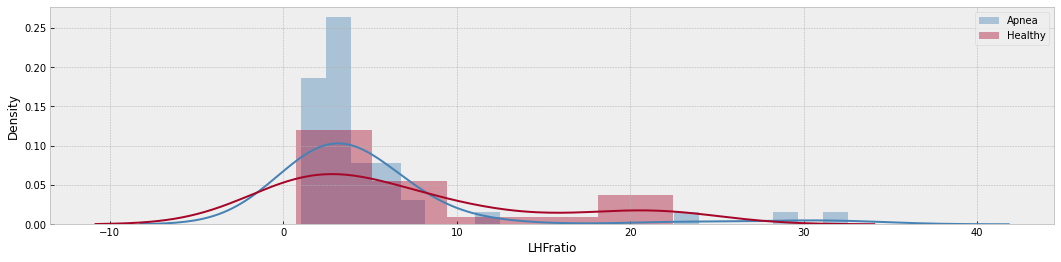

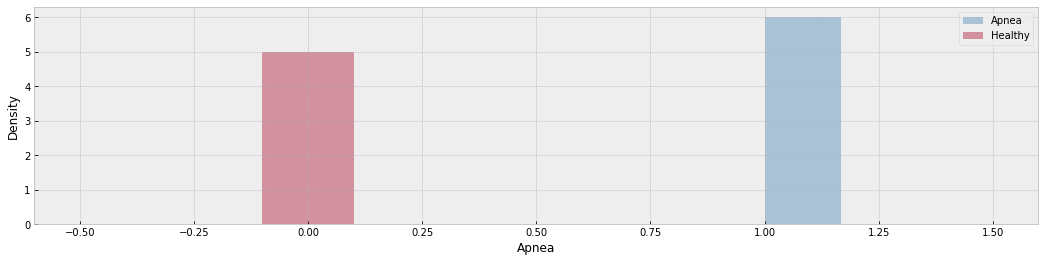

In [78]:
i=0
target = 'Apnea'
freq_cols = ['VLF', 'LF', 'HF', 'LHFratio', target]
for column in df_signals.columns:
    df_A = df_signals.loc[df_signals['Apnea']==1]
    df_H = df_signals.loc[df_signals['Apnea']==0]
    fig = plt.figure(figsize=(18,4))
    if column not in freq_cols:
        sns.histplot(df_A[column].dropna(),  color='steelblue', label='Apnea', kde=True)
        sns.histplot(df_H[column].dropna(),  color='#A60628', label='Healthy', kde=True) 
    else:
        sns.distplot(df_A[column].dropna(),  color='steelblue', label='Apnea', kde=True) 
        sns.distplot(df_H[column].dropna(),  color='#A60628', label='Healthy', kde=True) 
        fig=plt.legend(loc='best')
        plt.xlabel(column, fontsize=12);
        plt.show()
    i = i+1

Most of these distributions do not look normal.  The sample size is very small.  We would need to do some resampling.  Clearly the Apnea patients have higher values on indicators on those features used to calculate the classification.  We can also see that they tend to be older and heavier in weight.  They also appear to have much lower pNN50 counts considered measure of HeartRate Variability, as defined [here](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1767394/) as the mean number of times an hour in which the change in successive normal sinus (NN) intervals exceeds 50 ms), HRdiff, and variation in HR as a group (which we already noted as significant).  Let's look at Age, Gender, Weight, pNN50, HRdiff and frequency data.

In [83]:
All_Features = ['Length minutes', 'non-apn minutes', 'apnea minutes', 'hours w/apnea',
       'AI', 'HI', 'AHI', 'Age', 'Sex', 'height (cm)', 'weight (kg)', 'avnn',
       'hr', 'SDNN', 'pNN50', 'RMSSD', 'HRdiff', 'VLF', 'LF', 'HF', 'LHFratio']

Remove redundant features used to make classification:

In [97]:
Ind_Features = [ 'Age', 'Sex', 'height (cm)', 'weight (kg)', 'avnn',
       'hr', 'SDNN', 'pNN50', 'RMSSD', 'HRdiff', 'VLF', 'LF', 'HF', 'LHFratio']
Susp_Features = ['Age', 'Sex', 'weight (kg)', 'pNN50', 'hr', 'HRdiff', 'VLF', 'LF', 'HF', 'LHFratio']

Distributions of interest appear a bit skewed, giving the median as perhaps a better indicator of central tendency. 

In [104]:
print('Mann-Whitney Significant Features: Non-parametric')
for a in Ind_Features:
    U,p = stats.mannwhitneyu(df_signals[apnea][a],df_signals[healthy][a])
    if p < 0.05:
        print(f'Feature: {a}, P-Value: {p}, U: {U}')

Mann-Whitney Significant Features:
Feature: Age, P-Value: 2.345378872264243e-08, U: 117.0
Feature: Sex, P-Value: 2.6788435621938632e-05, U: 340.0
Feature: weight (kg), P-Value: 2.234596582362956e-08, U: 116.0
Feature: hr, P-Value: 0.002230136597501802, U: 330.0
Feature: SDNN, P-Value: 1.6007571368322384e-07, U: 145.0
Feature: pNN50, P-Value: 1.3130879936197993e-08, U: 108.0
Feature: RMSSD, P-Value: 2.2933008020766052e-08, U: 116.0
Feature: HRdiff, P-Value: 4.305164121983271e-06, U: 199.0
Feature: VLF, P-Value: 8.454882008979232e-06, U: 211.0
Feature: LF, P-Value: 2.512162524829687e-07, U: 152.0
Feature: HF, P-Value: 2.9058392696149807e-09, U: 87.0


In [102]:
print('T-test Significant Features: If Assume Normal, Equal Variance')
for a in Ind_Features:
    t,p = stats.ttest_ind(df_signals[apnea][a],df_signals[healthy][a])
    if p < 0.05:
        print(f'Feature: {a}, P-Value: {p}, t: {t}')

T-test Significant Features: Assume Equal Variance
Feature: Age, P-Value: 1.8826683898224103e-10, t: 7.4853327399296266
Feature: Sex, P-Value: 1.8766752361412885e-05, t: -4.602804436939219
Feature: weight (kg), P-Value: 1.7705574520273503e-07, t: 5.8169855915495265
Feature: hr, P-Value: 4.120634601334725e-05, t: -4.385454862209169
Feature: pNN50, P-Value: 2.8536705812135758e-11, t: -7.936849893638328


In [103]:
print('T-test Significant Features: if Assume Normal, Unequal Variance')
for a in Ind_Features:
    t,p = stats.ttest_ind(df_signals[apnea][a],df_signals[healthy][a], equal_var=False)
    if p < 0.05:
        print(f'Feature: {a}, P-Value: {p}, t: {t}')

T-test Significant Features: Assume Unequal Variance
Feature: Age, P-Value: 5.457024158647906e-10, t: 7.601413555652568
Feature: Sex, P-Value: 0.0008368152607096172, t: -3.732341479096385
Feature: weight (kg), P-Value: 6.115906873598009e-06, t: 5.262896266466887
Feature: hr, P-Value: 0.001070262191154705, t: -3.6233643096914774
Feature: pNN50, P-Value: 7.0832567333569726e-12, t: -8.494295451790046


T-tests show same features as significant regardless of assumption of population variance.

### Machine Learning

Not much time left for ML:

In [114]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics

In [109]:
X = df_signals.drop('Apnea',axis=1).values
y = df_signals['Apnea'].values

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=101)

In [111]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

#### Logisic Regression

In [156]:
log_reg = LogisticRegression(random_state=0).fit(X_train, y_train)
y_pred = log_reg.predict(X_test)

print(f'Confusion Matrix:\n\n{confusion_matrix(y_test,y_pred)}\n')
print(f'Classification Report:\n\n {classification_report(y_test,y_pred)}')
print(f'Accuracy Score: {accuracy_score(y_test, y_pred)}')

Confusion Matrix:

[[8 0]
 [1 9]]

Classification Report:

               precision    recall  f1-score   support

           0       0.89      1.00      0.94         8
           1       1.00      0.90      0.95        10

    accuracy                           0.94        18
   macro avg       0.94      0.95      0.94        18
weighted avg       0.95      0.94      0.94        18

Accuracy Score: 0.9444444444444444


#### Decision Tree

In [133]:
clf = DecisionTreeClassifier(max_depth=None, min_samples_split=2,random_state=0)
scores = cross_val_score(clf, X, y, cv=5)
scores.mean()

0.9428571428571428

#### Random Forest

In [112]:
clf = RandomForestClassifier(n_estimators=10, max_depth=None,min_samples_split=2, random_state=0)
scores = cross_val_score(clf, X, y, cv=5)
scores.mean()

0.9857142857142858

#### Extremely Randomized Tree

In [134]:
clf = ExtraTreesClassifier(n_estimators=10, max_depth=None, min_samples_split=2, random_state=0)
scores = cross_val_score(clf, X, y, cv=5)
scores.mean()

1.0